<a href="https://colab.research.google.com/github/ManuelD22/ICD/blob/master/EcDif2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuacion de difusion en 2D
Para la ecuacion de difusion en 2D, solamente agregamos una variable mas a la ecuación diferencial, así
\begin{equation}
\frac{\partial u}{\partial t}=\nu \frac{\partial^{2} u}{\partial x^{2}}+\nu \frac{\partial^{2} u}{\partial y^{2}}
\end{equation}
Al igual para la ecuación de difusion para una dimensión, procedemos a discretizar las derivadas, obteniendo un resultado similar para 1D
\begin{equation}
\frac{u_{i, j}^{n+1}-u_{i, j}^{n}}{\Delta t}=\nu \frac{u_{i}^{n}+1, j^{-2 u_{i}^{n}}, j^{+u_{i}^{n}}-1, j}{\Delta x^{2}}+\nu \frac{u_{i}^{n}, j+1^{-2 u_{i}^{n}}, j^{+u_{i}^{n}}, j-1}{\Delta y^{2}}
\end{equation}
Donde podemos ver que el termino $u_{i, j}^{n+1}$
\begin{equation}
\begin{aligned} u_{i, j}^{n+1}=u_{i, j}^{n} &+\frac{\nu \Delta t}{\Delta x^{2}}\left(u_{i+1, j}^{n}-2 u_{i, j}^{n}+u_{i-1, j}^{n}\right) \\ &+\frac{\nu \Delta t}{\Delta y^{2}}\left(u_{i, j+1}^{n}-2 u_{i, j}^{n}+u_{i, j-1}^{n}\right) \end{aligned}
\end{equation}


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  #libreria para graficar en 3d

In [0]:
nx = 31
ny = 31
nt = 17
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))  
un = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

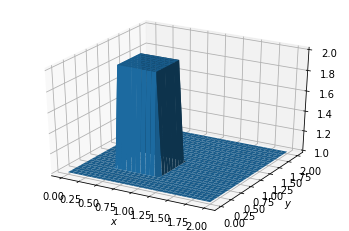

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

Al igual que para una dimension, hacemos una definición para suavizar la funcion resultante

In [0]:
def ddifusion(nt):
  u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
  for n in range(nt + 1): 
    un = u.copy()
    u[1:-1, 1:-1] = (un[1:-1,1:-1] + nu * dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +nu * dt / dy**2 * (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  surf = ax.plot_surface(X, Y, u)

  ax.set_zlim(1,2.5)
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$');

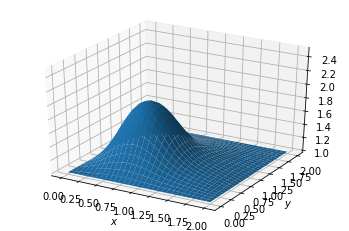

In [0]:
ddifusion(10)

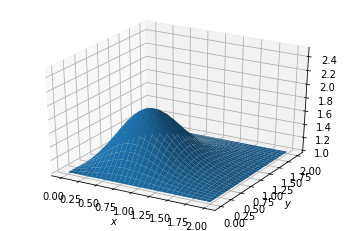

In [0]:
ddifusion(20)